In [16]:
import cv2
from pickle import load
from keras.models import load_model
import matplotlib.pyplot as plt
import imutils
import numpy as np

In [11]:
LB = load(
    open('../model/labels', 'rb'))
teat_model = load_model('../model/model_1')


In [17]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)


In [18]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(
        dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(
            roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation=cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1, 32, 32, 1)
        ypred = teat_model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

#plt.imshow(image)


In [19]:
def get_word(letter):
    word = "".join(letter)
    return word


PYHGW


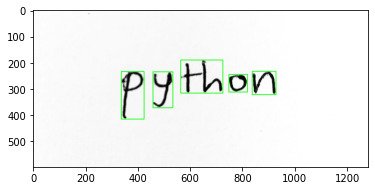

In [21]:
letter, image = get_letters("../images/pynb/text_01.jpeg")
word = get_word(letter)
print(word)
plt.imshow(image)

WCBAVETFIND1QRM1VNSHQLPS


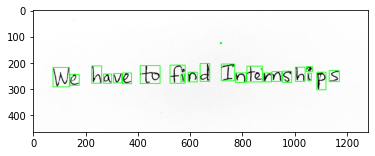

In [22]:
letter, image = get_letters("../images/pynb/text_02.jpeg")
word = get_word(letter)
print(word)
plt.imshow(image)


ALCDYG


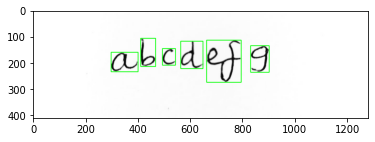

In [23]:
letter, image = get_letters("../images/pynb/text_03.jpeg")
word = get_word(letter)
print(word)
plt.imshow(image)


GW


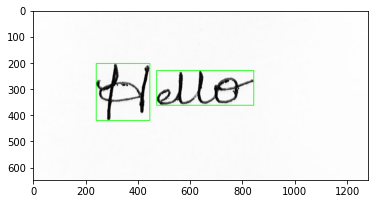

In [24]:
letter, image = get_letters("../images/pynb/text_04.jpeg")
word = get_word(letter)
print(word)
plt.imshow(image)


LLJV2GQ


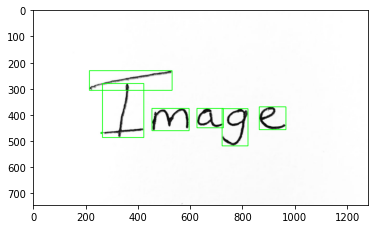

In [25]:
letter, image = get_letters("../images/pynb/text_05.jpeg")
word = get_word(letter)
print(word)
plt.imshow(image)


ABCGFRFG


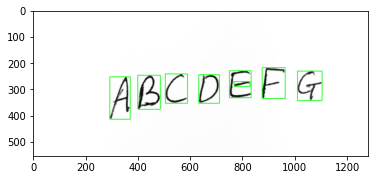

In [26]:
letter, image = get_letters("../images/pynb/text_06.jpeg")
word = get_word(letter)
print(word)
plt.imshow(image)
